In [1]:
#pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [2]:
#Download the VADER lexicon
nltk.download('vader_lexicon')

#Intialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Loading the dataset

In [3]:
df = pd.read_csv(r"/content/Tweets.csv")
df['text'] = df['text'].astype(str)

In [4]:
df.head()

,text,Unnamed: 1,Unnamed: 2
0,"I`d have responded, if I were going",NaN,NaN
1,Sooo SAD I will miss you here in San Diego!!!,NaN,NaN
2,my boss is bullying me...,NaN,NaN
3,what interview! leave me alone,NaN,NaN
4,"Sons of ****, why couldn`t they put them on t...",NaN,NaN


In [5]:
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

In [6]:
df['sentiment_scores'] = df['text'].apply(get_sentiment_scores)
display(df)

#Split sentiment scores into separate columns
df = pd.concat([df.drop(['sentiment_scores'] , axis = 1) , df['sentiment_scores'].apply(pd.Series)] , axis=1)

# Determine the overall sentiment
def get_analysis(compound_score):
    if compound_score < -0.05:
        return 'Negative'
    elif compound_score > 0.05:
        return 'Positive'
    else:
        return 'Neutral'

df['analysis'] = df['compound'].apply(get_analysis)

display(df)

,text,Unnamed: 1,Unnamed: 2,sentiment_scores
0,"I`d have responded, if I were going",NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Sooo SAD I will miss you here in San Diego!!!,NaN,NaN,"{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp..."
2,my boss is bullying me...,NaN,NaN,"{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'comp..."
3,what interview! leave me alone,NaN,NaN,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp..."
4,"Sons of ****, why couldn`t they put them on t...",NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative,"{'neg': 0.128, 'neu': 0.722, 'pos': 0.15, 'com..."
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou..."
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,"{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp..."
27479,But it was worth it ****.,But it was worth it ****.,positive,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou..."


,text,Unnamed: 1,Unnamed: 2,neg,neu,pos,compound,analysis
0,"I`d have responded, if I were going",NaN,NaN,0.000,1.000,0.000,0.0000,Neutral
1,Sooo SAD I will miss you here in San Diego!!!,NaN,NaN,0.474,0.526,0.000,-0.7437,Negative
2,my boss is bullying me...,NaN,NaN,0.494,0.506,0.000,-0.5994,Negative
3,what interview! leave me alone,NaN,NaN,0.538,0.462,0.000,-0.3595,Negative
4,"Sons of ****, why couldn`t they put them on t...",NaN,NaN,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative,0.128,0.722,0.150,0.1027,Positive
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative,0.000,0.890,0.110,0.3818,Positive
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,0.000,0.572,0.428,0.9136,Positive
27479,But it was worth it ****.,But it was worth it ****.,positive,0.000,0.680,0.320,0.3291,Positive


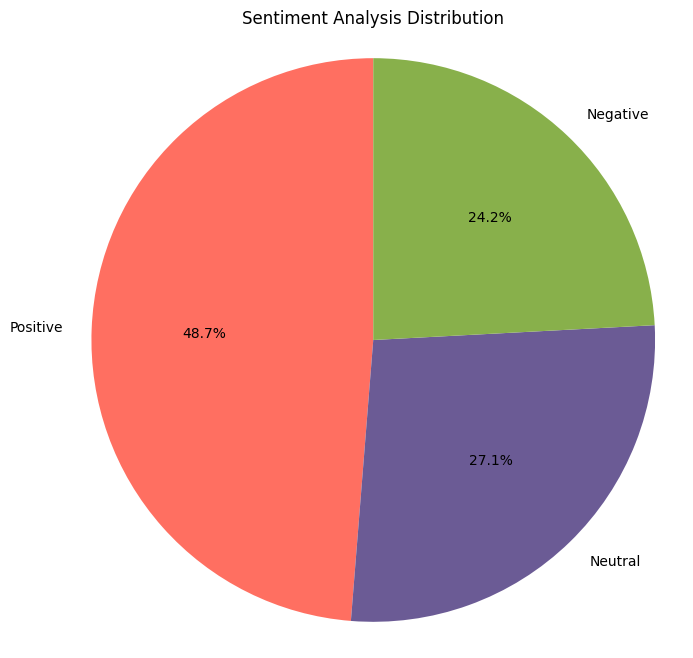

In [7]:
import matplotlib.pyplot as plt
sentiment_counts = df['analysis'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6F61', '#6B5B95', '#88B04B'])
plt.title('Sentiment Analysis Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()